In [1]:
library(limma)
library(reshape2)
library(gridExtra)

source("../../evaluation_utils/plots/eda_plots.R")
source("../../evaluation_utils/filtering/filtering_normalization.R")

source("../../evaluation_utils/simulation/simulation_func.R")

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Warning message:
“package ‘gridExtra’ was built under R version 4.2.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.2.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.2”
Warning message:
“package ‘readr’ was built under R version 4.2.2”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.2”
Warning message:
“package ‘lubridate’ was built under R version 4.2.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3

# Settings

Parameters set to generate simulated data with 600 samples and 6000 proteins.

In [2]:
generate_metadata <- function(batch_info, mode){

    if (mode == "balanced"){
        # Create batch assignments for each group
        batches <- rep(c("batch1", "batch2", "batch3"), each = 100)
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", 300), rep("B", 300)))
        batch_info$batch <- as.factor(c(batches[sample(1:300)], batches[sample(1:300)]))

    } else if (mode == "imbalanced") {
        # Strong imbalance
        # Create batch assignments for each group    
        batches_A <- c(rep("batch1", 32), rep("batch2", 28), rep("batch3", 288))
        batches_B <- c(rep("batch1", 8), rep("batch2", 52), rep("batch3", 192))
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", length(batches_A)), rep("B", length(batches_B))))
        batch_info$batch <- as.factor(c(
            batches_A[sample(1:length(batches_A))], 
            batches_B[sample(1:length(batches_B))]))
    } else if(mode == "mild_imbalanced") {
        # Mild imbalance
        # Create batch assignments for each group    
        batches_A <- c(rep("batch1", 36), rep("batch2", 91), rep("batch3", 185))
        batches_B <- c(rep("batch1", 54), rep("batch2", 49), rep("batch3", 185))
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", length(batches_A)), rep("B", length(batches_B))))
        batch_info$batch <- as.factor(c(
            batches_A[sample(1:length(batches_A))], 
            batches_B[sample(1:length(batches_B))]))
    }

    return(batch_info)

}

In [3]:
workdir <- "/home/yuliya/repos/cosybio/FedProt/data/simulated_data/"

number_of_runs = 50

mu_1 = 1.25
mu_4 = 1.25

frac_1 = 0.04
frac_7 = 0.15

# number of samples
m = 600

## generate data

In [4]:
check_dirs <- function(workdir){
    if (!dir.exists(workdir)){
        dir.create(workdir)
    }
}

`summarise()` has grouped output by 'batch'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
# Groups:   batch [3]
  batch  condition     n
  <fct>  <fct>     <int>
1 batch1 A            36
2 batch1 B            54
3 batch2 A            91
4 batch2 B            49
5 batch3 A           185
6 batch3 B           185
0.52 
0.48[1] "Run number 1"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 2"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 3"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 4"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 5"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 6"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 7"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 8"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 9"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run num

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(lab)

  # Now:
  data %>% select(all_of(lab))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


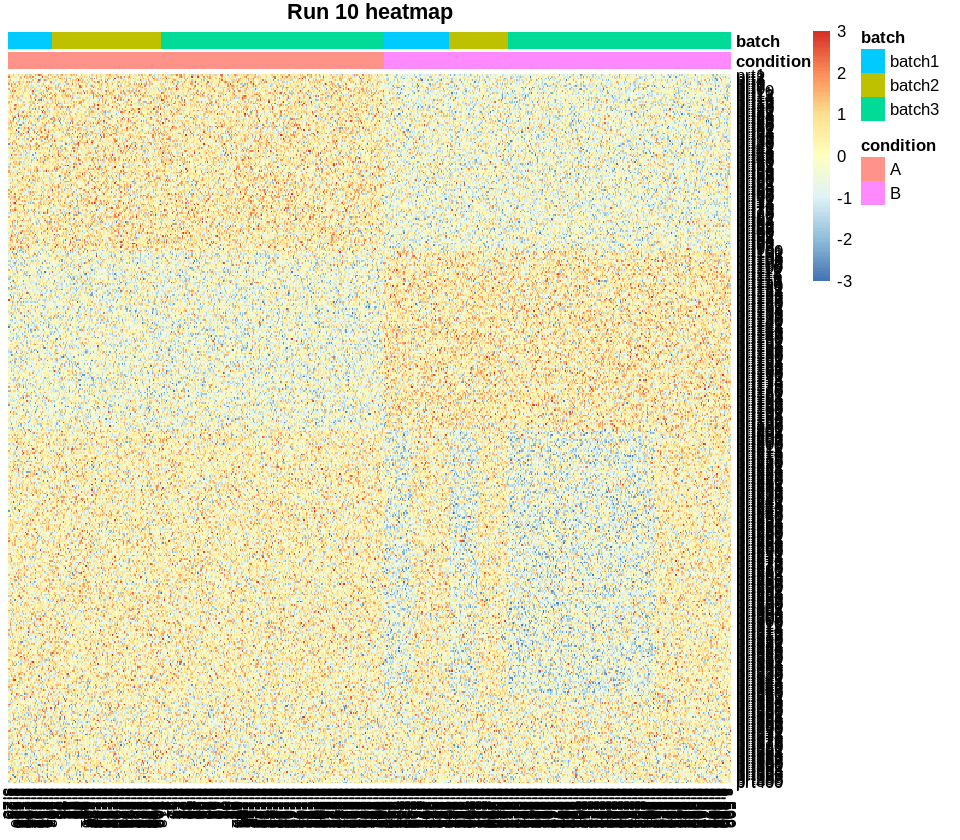

[1] "Run number 11"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 12"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 13"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 14"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 15"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 16"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 17"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 18"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 19"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 20"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 


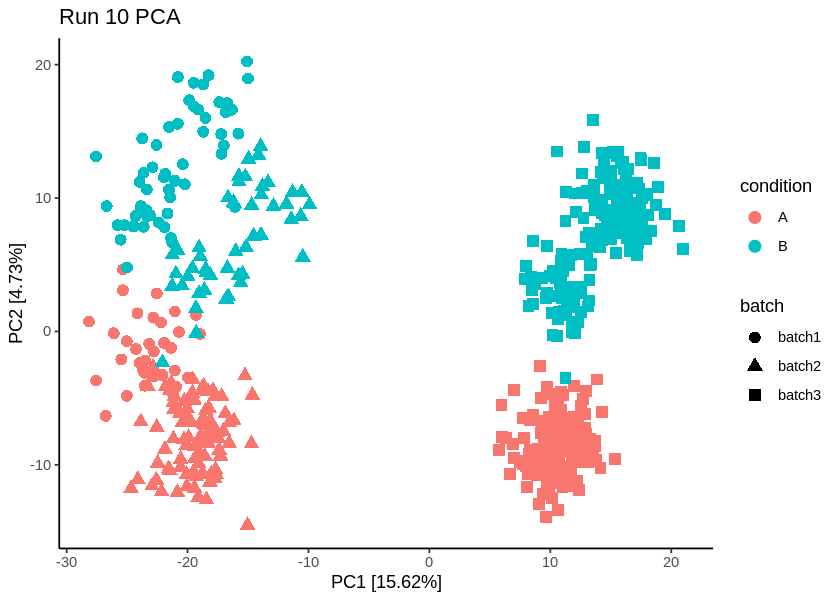

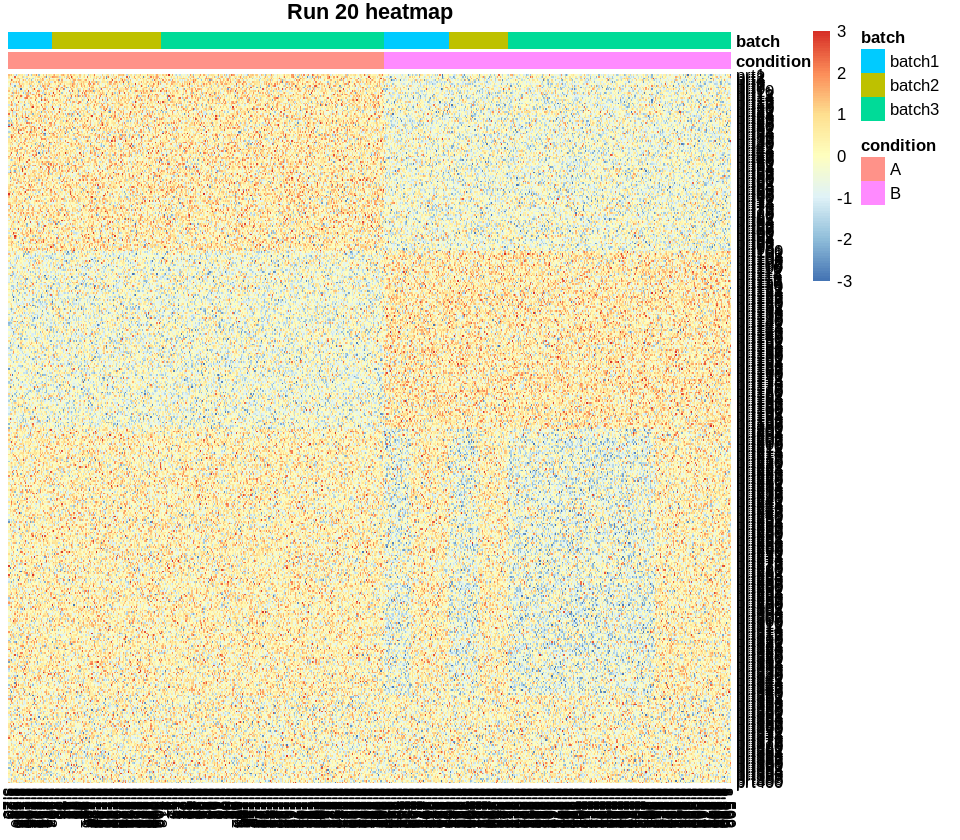

[1] "Run number 21"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 22"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 23"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 24"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 25"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 26"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 27"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 28"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 29"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 30"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 


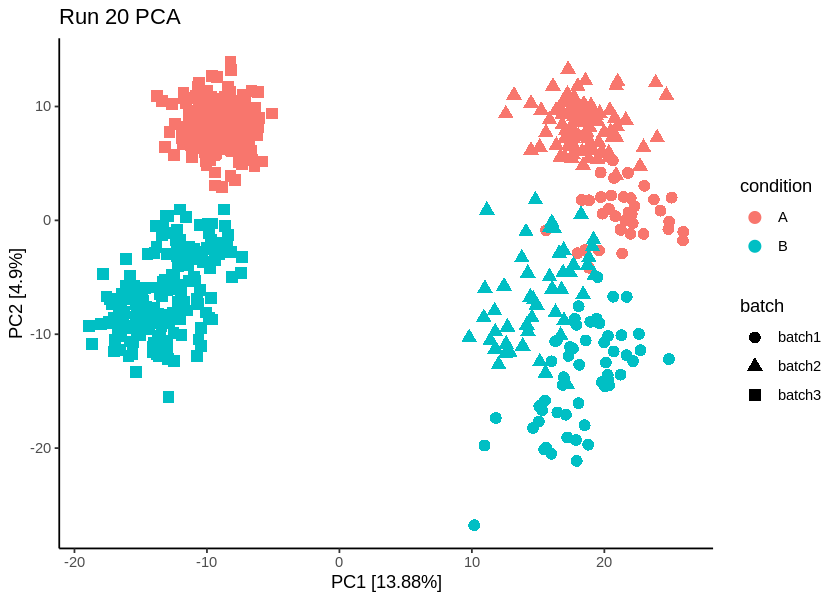

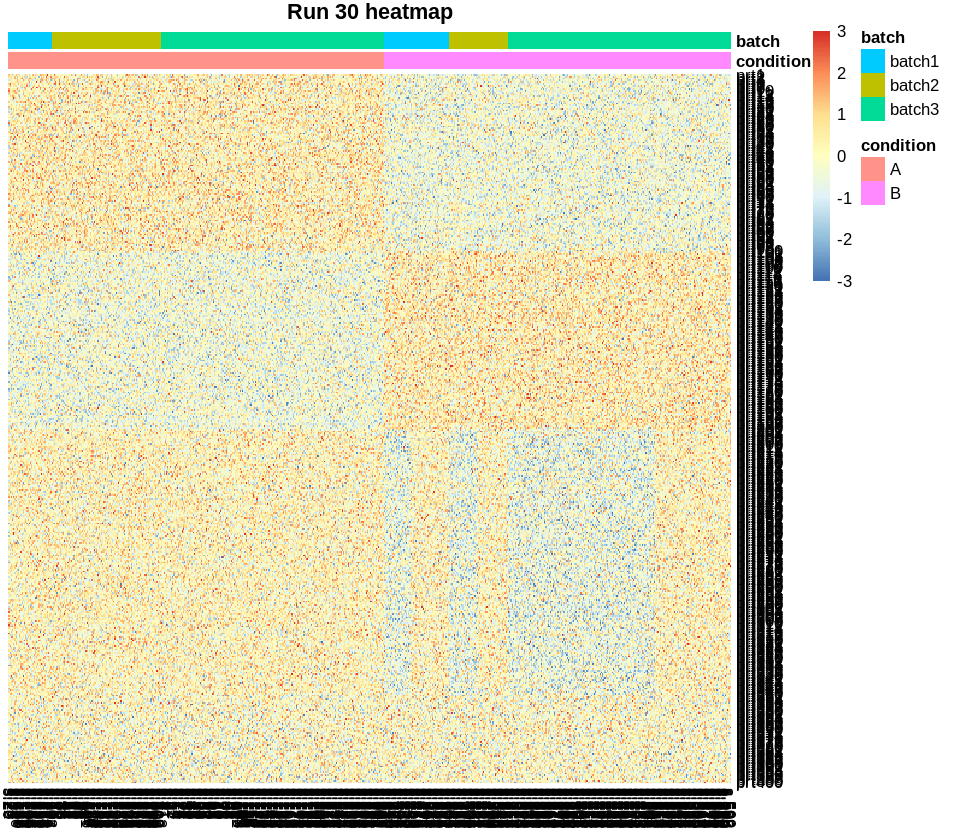

[1] "Run number 31"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 32"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 33"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 34"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 35"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 36"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 37"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 38"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 39"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 40"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 


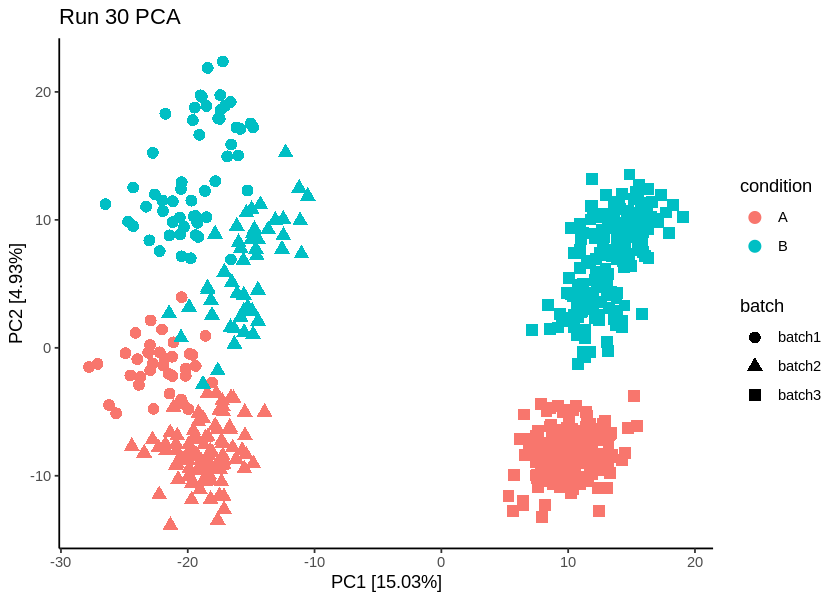

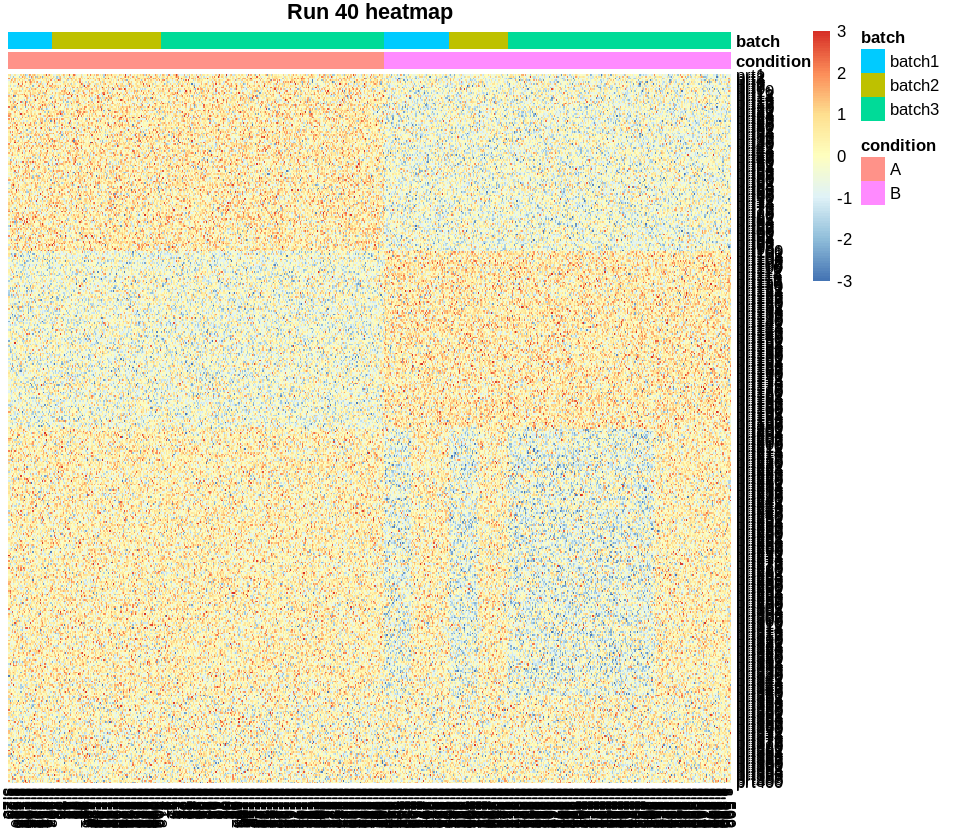

[1] "Run number 41"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 42"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 43"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 44"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 45"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 46"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 47"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 48"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 49"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 
[1] "Run number 50"
168 
Number of DE proteins:  350 
  Number of proteins:  6000 


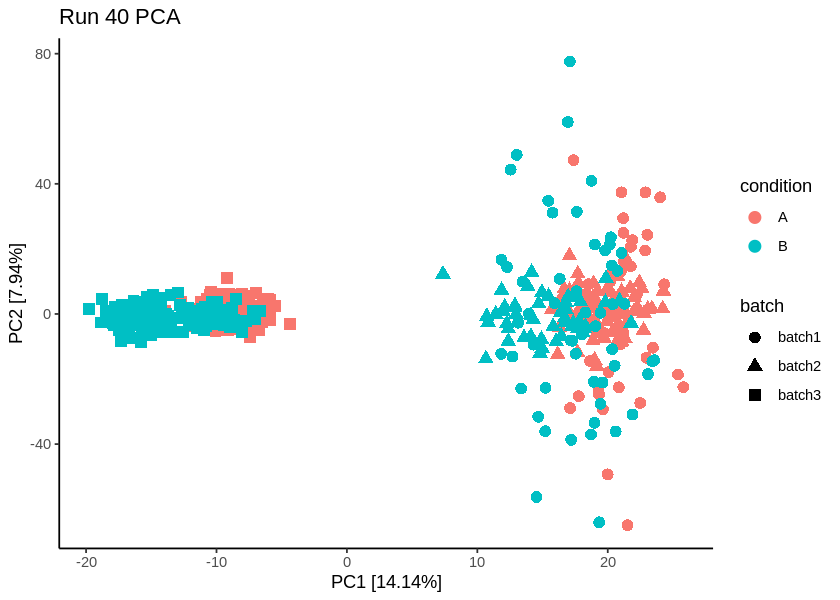

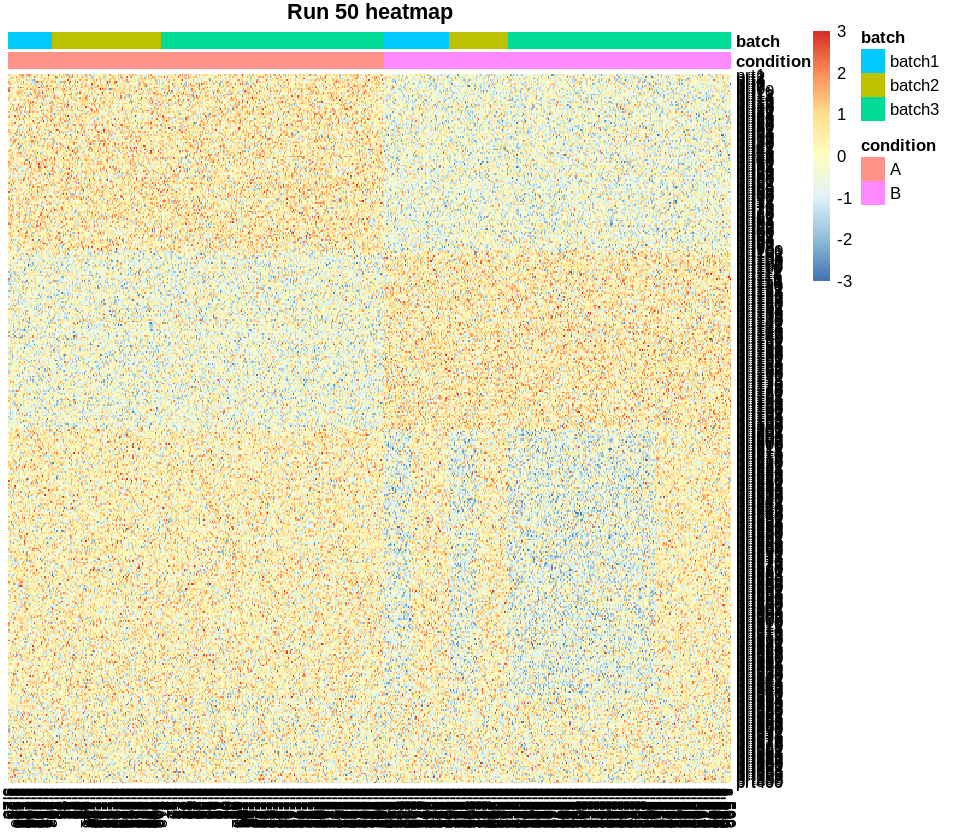

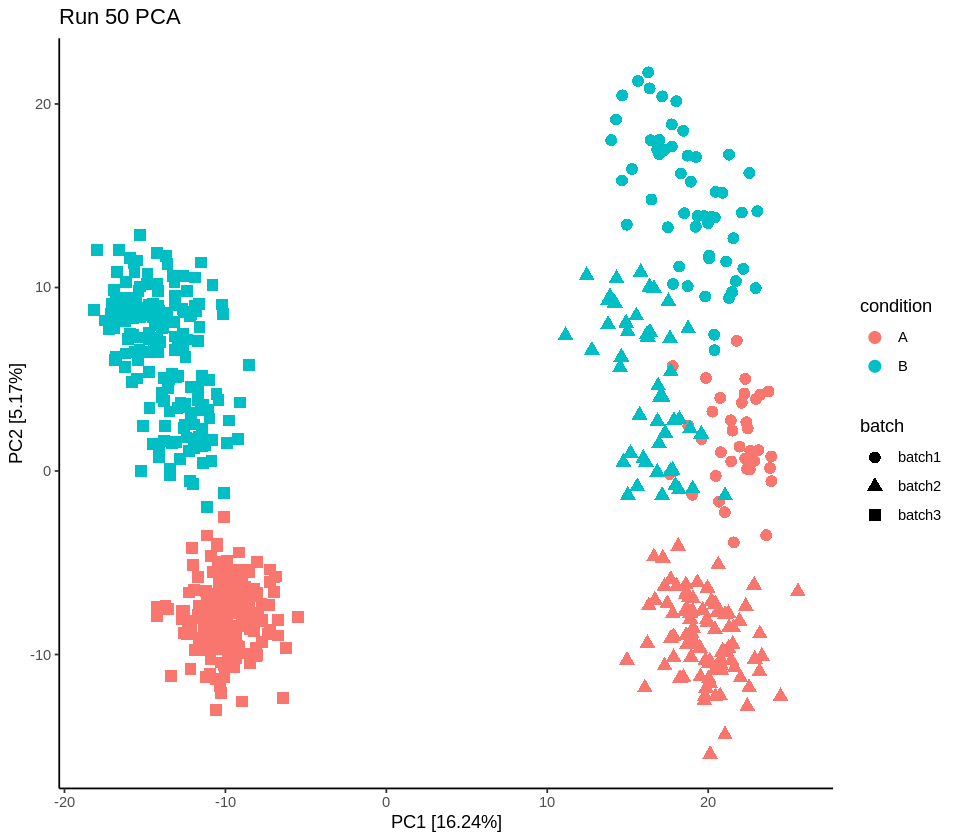

In [6]:
for (mode in c("mild_imbalanced")){  #"balanced", "imbalanced", 
    sub_path = mode

    # Set directories
    generated_data_directory <- paste0(workdir, sub_path, "/data")
    check_dirs(generated_data_directory)

    # Create metadata
    batch_info <- data.frame(file = paste("s", 1:600, sep="."))
    rownames(batch_info) <- batch_info$file
    batch_info <- generate_metadata(batch_info, mode)
    batch_info %>% group_by(batch, condition) %>%
        summarise(n = n()) %>% print()
    
    # Set parameters for simulation
    col_frac_A = length(batch_info[batch_info$condition == "A",]$file) / 600
    col_frac_B = length(batch_info[batch_info$condition == "B",]$file) / 600
    cat(col_frac_A, "\n")
    cat(col_frac_B)


    # Run simulation
    for(j in 1:number_of_runs){
        i = 1  
        print(paste0("Run number ", j))
        set.seed(runif(1, 1, 10000))

        result <- generate_data(
            col_frac_A, col_frac_B,
            frac_1, frac_7,
            mu_1=mu_1, mu_4=mu_4,
            batch_info=batch_info,
            mode_version = mode,
            m = m
        ) %>% as.data.frame()
        
        number_DE <- frac_1*2500*2 + frac_7*1000

        rownames(result) <- c(paste0("prt", 1:length(rownames(result))))
        dim(result)
        cat("Number of DE proteins: ", number_DE, "\n", " Number of proteins: ", nrow(result), "\n")

        # second, add batch effects
        data_with_batch_effects <- add_batch_effect(result, batch_info)

        # Add missing values
        data_with_batch_effects_missing <- simulateMissingValues(data_with_batch_effects, alpha = 0.2, beta = 0.5)
        sum(is.na(data_with_batch_effects_missing)) / (nrow(data_with_batch_effects_missing) * ncol(data_with_batch_effects_missing))

        #write data for each lab
        write.table(data_with_batch_effects_missing[, batch_info[batch_info$batch == "batch1",]$file], 
                    paste0(generated_data_directory, "/",  j, "_lab_1_intensities_data.tsv"), sep = "\t")
        write.table(data_with_batch_effects_missing[, batch_info[batch_info$batch == "batch2",]$file],
                    paste0(generated_data_directory, "/",  j, "_lab_2_intensities_data.tsv"), sep = "\t")
        write.table(data_with_batch_effects_missing[, batch_info[batch_info$batch == "batch3",]$file],
                    paste0(generated_data_directory, "/",  j, "_lab_3_intensities_data.tsv"), sep = "\t")

        if (j %% 10 == 0){
            # plots here
            # reorder batch_info first by condition, then by batch inside condition
            batch_info_plot <- batch_info[order(batch_info$condition, batch_info$batch),]
            # z-transform the data
            result_z <- t(scale(t(result[, batch_info_plot$file])))

            options(repr.plot.width=7, repr.plot.height=5)
            heatmap_nocor_plot(
                result_z[1:(number_DE+50),], batch_info_plot, paste0("Run ", j),
                condition="condition", lab="batch",
                use_breaks = TRUE)

            # reorder batch_info first by condition, then by batch inside condition
            options(repr.plot.width=8, repr.plot.height=7)
            pca_plotted <- pca_plot(data_with_batch_effects[, batch_info$file][1:number_DE,], batch_info, 
                title=paste0(paste0("Run ", j), " PCA"),
                quantitative_col_name='file',
                col_col='condition', shape_col='batch'
            )
            print(pca_plotted)
        }
    }
    # write batch info
    write.table(batch_info, paste0(generated_data_directory, "/batch_info.tsv"), sep = "\t")
}